# EE4375-2022: First Lab Session: Introduction to Julia and GMSH 

In this lab session we introduce the [Julia](http://www.julialang.org) programming language and the [GMSH](https://gmsh.info) package for geometry definition and mesh generation. 

## Import All Required Packages

In [47]:
using LinearAlgebra
using SparseArrays
using Plots
using LaTeXStrings
using BenchmarkTools 

# Introduction to Julia

## Define a mesh on the interval 
Study code that follows. What is the size of the resulting vector x? Decrease the value of the meshwidth h (keeping xstart and xend fixed). Consult the documentation of the typeof() function. What is the type of x? Replace the Vector() function by an explicit for-loop. Plot x vs. x using various line styles. 

In [48]:
N = 4; 
h = 1/N;
xstart = 0
xend = 1
x = Vector(xstart:h:xend)

5-element Vector{Float64}:
 0.0
 0.25
 0.5
 0.75
 1.0

## Define a source vector 
Study code that follows. What is the size of the resulting vector f? Decrease the value of the meshwidth h (keeping xstart and xend fixed). Plot f versus x. Try various values of mu and sigma. What is the type of sourceFct? Consult the documentation of the methods() function. Apply the methods function to sourceFct. Consult the documentation of the map() function. Replace the dot-syntax (referred to as broadcast in Julia) using the map() function. 

In [49]:
# define the so-called source function 
function sourceFct(x)
    mu = 0.3
    sigma = .1
    return exp( -(x-mu)^2/sigma^2)
end 

sourceFct (generic function with 1 method)

In [50]:
# apply the source to the previously defined vector. Observe the dot-syntax. 
f = sourceFct.(x)

5-element Vector{Float64}:
 0.00012340980408667978
 0.778800783071405
 0.01831563888873418
 1.6052280551856172e-9
 5.242885663363538e-22

## Define a matrix 
Study code that follows. What is the size and type of the resulting vector A? Decrease the value of the meshwidth h. Contruct the matrix A using map to replace the for-loop. Consult the documentation the function Tridiagonal() in the LinearAlgebra package. Contruct the matrix A using the function Tridiagonal(). 

In [51]:
h2 = h*h;
Np1 = N+1; 
# initialize to zero matrix 
A = zeros(Np1,Np1)

# loop over rows and columns to set values of matrix A 
for i ∈ axes(A,1), j ∈ axes(A,2)
    if (i==j) A[i,j] = 2/h2 end 
    if ((i==j-1) || (i==j+1)) A[i,j] = -1/h2 end 
end

A

5×5 Matrix{Float64}:
  32.0  -16.0    0.0    0.0    0.0
 -16.0   32.0  -16.0    0.0    0.0
   0.0  -16.0   32.0  -16.0    0.0
   0.0    0.0  -16.0   32.0  -16.0
   0.0    0.0    0.0  -16.0   32.0

## Perform a bit of Black Magic Explained Later in the Course 

In [52]:
# modify the first row of matrix A 
A[1,1] = 1; A[1,2] = 0; 
# modify the last row of matrix A 
A[end,end] = 1; A[end,end-1] = 0;  
A

5×5 Matrix{Float64}:
   1.0    0.0    0.0    0.0    0.0
 -16.0   32.0  -16.0    0.0    0.0
   0.0  -16.0   32.0  -16.0    0.0
   0.0    0.0  -16.0   32.0  -16.0
   0.0    0.0    0.0    0.0    1.0

## Solve a Linear System and Plot the Computed Solution
Study code that follows. Study how the linear systems is being solved. Consult the documentation of the lu() function. Perform the explicit LU-decompostioon of the matrix A. Extend the size of the system being solved. Extend the plotting function with labeling of axis, title and legend. Extend the plotting function to plot both f vs. x and u vs. x. Try various values of mu and sigma. Replace the monopole source function by a dipole source function.   

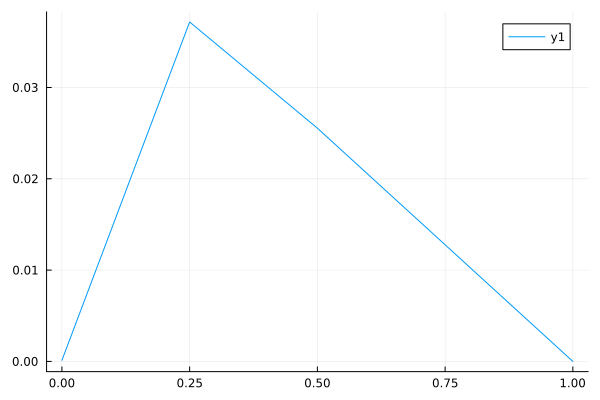

In [53]:
u  = A \ f
plot(x,u)

# Introduction to GMSH

## Section 1:/ Introduction

[GMSH](https://gmsh.info) is a package for geometry definition and mesh generation. 

Tutorials on the use of GMSH are listed at [GMSH Julia Tutorials](https://gitlab.onelab.info/gmsh/gmsh/-/tree/master/tutorials/julia).

## Section 2:/ Installing GMSH as a Julia Package

Install GMSH as a Julia following the instructions provided at [GMSH.jl](https://github.com/JuliaFEM/Gmsh.jl). 

In case of difficulties on a Windows, proceed as described below. 

### Problem on Windows
Installing Gmsh.jl via the Pkg manager yields an error on Windows machines.
```
julia> using Pkg; Pkg.add("Gmsh")
ERROR: Error building `Gmsh`:
ERROR: LoadError: Your platform ("x86_64-w64-mingw32", parsed as "x86_64-w64-mingw32-gcc8-cxx11") is not supported by this package!
```

### Workaround
1. Download the Gmsh SDK from https://gmsh.info/ and unzip the contents.
2. Now, Gmsh can be used in Julia by executing
```
include("PATH_TO_SDK/lib/gmsh.jl")
```
where `PATH_TO_SDK` is the location where you unzipped the SDK files.
3. This is not ideal as permanent solution. To improve this, we can add the SDK /lib folder to Julia\'s `LOAD_PATH` and load it using the normal package inclusion methods. To do this, execute
```
push!(LOAD_PATH, "PATH_TO_SDK/lib")
using gmsh
```
4. To make this change permanent, the line
```
push!(LOAD_PATH, "PATH_TO_SDK/lib")
```
can be placed in the startup script located at `C:\Users\$user\.julia\config\startup.jl`. If this script is not present you can create it. Take care that the extension is `.jl` and not `.jl.txt`, which Windows is likely to do for you.
5. After making this change and restarting the Julia command prompt, you should be able to use
```
using gmsh
```
or
```
import gmsh
```
to use Gmsh as a package. Try this by executing one of the tutorial scripts in `PATH_TO_SDK\share\doc\gmsh\tutorials\julia`.

## Section 3:/ First Example 

1. Describe how geometry is generated using points, lines and surfaces; 
2. Describe how mesh is generated using mesh parameter setting and mesh generation; 

## Section 4:/ More Examples

## References